## Immunotherapy data processing and figure 5. 

In [149]:
%matplotlib inline

In [80]:
import numpy as np
import math
import seaborn as sns
import  statsmodels.stats.multitest
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from statannot import add_stat_annotation
from scipy import stats
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler

In [81]:
## single sample gsva score calculator for python https://github.com/DavisLaboratory/PySingscore
from importlib.machinery import SourceFileLoader
singscore = SourceFileLoader("singscore", "path/to/singscore/").load_module()
from singscore.singscore import *

In [82]:
## file path to data
res="data/Immunotherapy/"

## Functions

In [83]:
def gsva(df,study):
    
    if True in  set(np.array(df.index.str.contains('PSMB'))):
        df= df
    else:
        df=df.T
        
    ##Genes for different GSVA score category
    B_cells=['ABCB4','BACH2','BCL11A','BLK','BLNK','CCR9','CD19','CD72','COCH','CR2','DTNB','FCRL2','GLDC','GNG7','HLA-DOB','HLA-DQA1','IGHA1','IGHG1','IGHM','IGKC','IGLC6','FAM30A','MEF2C','MICAL3','MS4A1','OSBPL10','PNOC','QRSL1','SCN3A','SLC15A2','SPIB','TCL1A','TNFRSF17']
    Eosinophils=['ABHD2','ACACB','TRMO','CAT','CCR3','CLC','CYSLTR2','ADGRE1','EPN2','GALC','PTGDR2','HES1','HIST1H1C','HRH4','CD101','IL5RA','KBTBD11','KCNH2','LRP5L','MYO15B','RCOR3','RNASE2','RRP12','SIAH1','SMPD3','SYNJ1','TGIF1','THBS1','THBS4','TIPARP','TKTL1']
    Macrophages=['APOE','ATG7','BCAT1','CCL7','CD163','CD68','CD84','CHI3L1','CHIT1','CLEC5A','COL8A2','COLEC12','CTSK','CXCL5','CYBB','DNASE2B','EMP1','FDX1','FN1','GM2A','GPC4','ANOS1','MARCO','ME1','MS4A4A','MSR1','PCOLCE2','PTGDS','RAI14','SCARB2','SCG5','SGMS1','SULT1C2']
    Mast_cells=['ABCC4','ADCYAP1','CALB2','CEACAM8','CMA1','CPA3','CTSG','ELANE','GATA2','HDC','HPGD','HPGDS','KIT','LINC01140','MAOB','MLPH','MPO','MS4A2','NR0B1','PPM1H','PRG2','PTGS1','SCG2','SIGLEC6','SLC18A2','SLC24A3','TAL1','TPSAB1','TPSB2','VWA5A']
    NK_CD56bright=['DUSP4','FOXJ1','LPCAT4','MADD','MARCH6','MPPED1','MUC3B','TRAPPC9','PLA2G6','RRAD','XCL1']
    NK_CD56dim= ['S1PR5','TTC38','GTF3C1','GZMB','IL21R','KIR2DL3','KIR2DS1','KIR2DS2','KIR2DS5','KIR3DL1','KIR3DL2','KIR3DL3','KIR3DS1','SPON2','PMEPA1']
    Neutrophils=['ALPL','BST1','CD93','CEACAM3','CREB5','CRISPLD2','CSF3R','CYP4F3','DYSF','FCAR','FCGR3B','CPPED1','FPR1','FPR2','G0S2','HIST1H2BC','HPSE','CXCR1','CXCR2','KCNJ15','LILRB2','MGAM','MME','PDE4B','S100A12','SIGLEC5','SLC22A4','SLC25A37','TECPR2','TNFRSF10C','VNN3']
    T_helper = ['ANP32B','ASF1A','ATF2','BATF','BORA','CD28','DDX50','FAM111A','FRYL','GOLGA8A','ICOS','ITM2A','LRBA','NAP1L4','NUP107','PHF10','PPP2R5C','RPA1','SEC24C','SLC25A12','SRSF10','TRA','UBE2L3','YME1L1']
    Tem = ['AKT3','SND1-IT1','CCR2','DDX17','EWSR1','FLI1','GDPD5','LTK','MEFV','NFATC4','PRKY','TBC1D5','TBCD','TRA','EZR']
    Tfh = ['B3GAT1','CXCR5','LDLRAD4','CDK5R1','CHGB','CHI3L2','CXCL13','HEY1','HIST1H4K','ICA1','KCNK5','KIAA1324','MAF','MAGEH1','MKL2','MYO6','MYO7A','PASK','PDCD1','POMT1','PTPN13','PVALB','SH3TC1','SIRPG','SLC7A10','SMAD1','ST8SIA1','STK39','THADA','TOX','TSHR','ZNF764']
    aDC=['CCL1','EBI3','IDO1','LAMP3','OAS3']
    iDC=['ABCG2','BLVRB','CARD9','CD1A','CD1B','CD1C','CD1E','CH25H','CLEC10A','CSF1R','CTNS','F13A1','FABP4','FZD2','GSTT1','GUCA1A','HS3ST2','LMAN2L','MMP12','MS4A6A','NUDT9','PDXK','PPARG','PREP','RAP1GAP','SLC26A6','SLC7A8','SYT17','TACSTD2','DCSTAMP','VASH1']
    Activated_CD8_T= ['ADRM1','AHSA1','C1GALT1C1','CCT6B','CD37','CD3D','CD3E','CD3G','CD69','CD8A','CETN3','CSE1L','GEMIN6','GNLY','GPT2','GZMA','GZMH','GZMK','IL2RB','LCK','MPZL1','NKG7','PIK3IP1','PTRH2','TIMM13','ZAP70']
    Gamma_delta_T  =['ACP5','AQP9','BTN3A2','C1orf54','CARD8','CCL18','CD209','CD33','CD36','CDK5','IL10RB','KLRF1','LGALS1','MAPK7','KLHL7','KRT80','LAMC1','LCORL','LMNB1','MEIS3P1','MPL','FABP1','FABP5','FADD','MFAP3L','MINPP1','RPS24','RPS7','RPS9','DBNL','CCL13']
    Regulatory_T= ['CCL3L1','CD72','CLEC5A','FOXP3','ITGA4','L1CAM','LIPA','LRP1','LRRC42','MARCO','MMP12','MNDA','MRC1','MS4A6A','PELO','PLEK','PRSS23','PTGIR','ST8SIA4','STAB1']
    Tcm = ['AQP3','ATF7IP','ATM','CASP8','CDC14A','CEP68','CLUAP1','CREBZF','CYLD','DOCK9','FAM153B','FOXP1','FYB1','HNRNPH1','INPP4B','KLF12','MAP3K1','KMT2A','N4BP2L2-IT2','NEFL','NFATC3','PCM1','PCNX1','PDXDC2P','PHC3','PSPC1','REPS1','RPP38','SLC7A6','SNRPN','ST3GAL1','STX16','TIMM8A','TRAF3IP3','TXK','TXLNGY','USP9Y']
    Cytotox=['APBA2','APOL3','CTSW','DUSP2','GNLY','GZMA','GZMH','KLRB1','KLRD1','KLRF1','KLRK1','NKG7','RORA','RUNX3','SIGIRR','WHAMMP3','ZBTB16']
    Exhausted=["LAG3", "HAVCR2", "PDCD1"]
    EMT=['CDH1','DSP','TJP1','VIM','CDH2','FOXC2','SNAI1','SNAI2','TWIST1','GSC','FN1','ITBG6','MMP2','MMP3','MMP9','SOX10']

    ###Features
    features=['B_cells','Eosinophils','Macrophages','Mast_cells','NK_CD56bright','NK_CD56dim','Neutrophils','T_helper','Tem','Tfh','aDC','iDC','Activated_CD8_T','Gamma_delta_T','Regulatory_T','Tcm','Cytotox','Exhausted','EMT']
    
    ## Calculating gsva for cells
    for cl in features:
        df.loc[cl,]=score(up_gene=eval(cl),sample=df,norm_method='standard')['total_score']
    
    df.index.name='Gene'
    df.loc[features,].to_csv(F"data/Immunotherapy/GSVA/{study}.csv")
    
    return df

In [84]:
def avg(df,res,name):
    features=['B_cells','Eosinophils','Macrophages','Mast_cells','NK_CD56bright','NK_CD56dim','Neutrophils','T_helper','Tem','Tfh','aDC','iDC','Activated_CD8_T','Gamma_delta_T','Regulatory_T','Tcm','Cytotox','Exhausted','EMT']
    if True in  set(np.array(df.index.str.contains('PSMB'))):
        df= df.T
    
    tst=pd.DataFrame(index=df.index)
    tst['Immunoproteasome']=(1/3)*(np.log2(df["PSMB8"]+1)+np.log2(df["PSMB9"]+1)+np.log2(df["PSMB10"]+1))
    tst['Const_proteasome']=(1/3)*(np.log2(df["PSMB5"]+1)+np.log2(df["PSMB6"]+1)+np.log2(df["PSMB7"]+1))
    for cl in features:
        tst[cl]=df[cl]
    tst['clust']=1
    tst['clust'][tst.index.isin(res)]=0
    tst['name']="Responders"
    tst['name'][tst['clust']==1]='Non-Responders'
    tst['study']=name
    
    return tst

In [85]:
def plot_median_score(tst):
    name=tst['study'].unique()
    med=tst.groupby('name').median().T[2:-1]
    for ff in med.index:
        x=np.array(tst[ff][tst['name']=='Responders'])
        y=np.array(tst[ff][tst['name']!='Responders'])
        s,p=scipy.stats.mannwhitneyu(x, y)
        med.loc[ff,'p-value']=p
    med=med.sort_values('p-value')
    med['label']=med.index
    fig, ax = plt.subplots(figsize=(8, 8))
    g=sns.scatterplot(x="Non-Responders", y="Responders",data=med ,alpha=1,linewidth=0,palette='flare',hue=-np.log10(med["p-value"]),ax=ax)
    ax.set(xlim=(med[['Non-Responders', 'Responders']].min().min()-0.02, med[['Non-Responders', 'Responders']].max().max()+0.02))
    ax.set(ylim=(med[['Non-Responders', 'Responders']].min().min()-0.02, med[['Non-Responders', 'Responders']].max().max()+0.02))
    plt.plot([med[['Non-Responders', 'Responders']].min().min()-0.02, med[['Non-Responders', 'Responders']].max().max()+0.02], [med[['Non-Responders', 'Responders']].min().min()-0.02, med[['Non-Responders', 'Responders']].max().max()+0.02], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
    norm = plt.Normalize(vmin=med['p-value'].min(), vmax=med['p-value'].max())
    sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
    sm.set_array([])
    ax.figure.colorbar(sm,shrink=1,aspect=30,orientation='horizontal',label='-log10(p-value)')
    text=[]
    for (x,y,label) in np.array(med[['Non-Responders', 'Responders', 'label']][:5]):
        text.append(plt.text(x,y,label,zorder=8,size=8))
    adjust_text(text, arrowprops=dict(arrowstyle='->', color='red',lw=0.5))
    ax.get_legend().remove()
    ax.set_title(F"Immune Signature in {name}")
    #plt.savefig("Melanoma_pd_sig.png",bbox_inches='tight',format="svg")
    plt.show()

## Immunothrapy studies

In [86]:
##combine studies
ips=[]

### PD-1 on melanoma 
pembrolizumab

In [87]:
st1= pd.read_csv(res+"mel_ucla_2016/FPKM.tsv", sep='\t',index_col=0)
st1.columns=st1.columns.str.replace('.baseline','')
st1.columns=st1.columns.str.replace('.OnTx','')
##low qualtiy sample
st1.drop(['Pt27B','Pt27A'],axis=1,inplace=True)

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
### clinical information
meta1=pd.read_csv(res+'mel_ucla_2016/data_clinical_patient.txt',sep='\t',index_col=0,skiprows=4)
meta1=meta1[meta1.index.isin(st1.columns)]
meta2=pd.read_csv(res+'mel_ucla_2016/data_clinical_sample.txt',sep='\t',index_col=0,skiprows=4)
meta2=meta2[meta2.index.isin(st1.columns)]

In [89]:
st1=gsva(st1,"Melanoma_pd")

In [90]:
###IP average expression
rs=meta2[meta2['TREATMENT_RESPONSE']!='Non-responder'].index ##responders
sc=avg(st1,rs,"Melanoma (pembrolizumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
plot_median_score(sc)

In [92]:
ips.append(sc[['Immunoproteasome','Const_proteasome', 'clust','name', 'study','EMT']])

### CTAL-4 on melanoma 

In [93]:
st2= pd.read_csv(res+"skcm_dfci_2015/data_RNA_Seq_expression_median.txt", sep='\t',index_col=0)
gn=pd.read_csv(res+"../genes_symbolz.tsv",sep='\t')
gn.columns=['Entrez_Gene_Id','symbol']
st2=pd.merge(gn,st2,on='Entrez_Gene_Id',how='right')
st2.dropna(inplace=True)
st2.index=st2.symbol
st2.drop(['Entrez_Gene_Id','symbol'],axis=1,inplace=True)
### clinical information
meta1=pd.read_csv(res+'/skcm_dfci_2015//data_clinical_patient.txt',sep='\t',index_col=0,skiprows=4)
meta1=meta1[meta1.index.isin(st2.columns)]
meta2=pd.read_csv(res+'/skcm_dfci_2015/data_clinical_sample.txt',sep='\t',index_col=0,skiprows=4)
meta2=meta2[meta2.index.isin(st2.columns)]

In [94]:
##Selecting only responders and non-responders
st2=st2.T
sts=['response','nonresponse','response','nonresponse','nonresponse','nonresponse','nonresponse','long-survival','nonresponse','nonresponse','nonresponse','long-survival','long-survival','response','nonresponse','nonresponse','nonresponse','response','response','nonresponse','nonresponse','nonresponse','nonresponse','nonresponse','nonresponse','response','response','nonresponse','response','response','nonresponse','long-survival','nonresponse','nonresponse','response','response','response','nonresponse','nonresponse','long-survival','response','response']
pt=['Pat02','Pat03','Pat04','Pat06','Pat08','Pat14','Pat15','Pat16','Pat19','Pat20','Pat25','Pat27','Pat28','Pat29','Pat33','Pat36','Pat37','Pat38','Pat39','Pat40','Pat41','Pat43','Pat44','Pat45','Pat46','Pat47','Pat49','Pat50','Pat79','Pat80','Pat81','Pat83','Pat85','Pat86','Pat88','Pat90','Pat91','Pat98','Pat118','Pat119','Pat123','Pat126']
meta1["res"]=''
for i,j in zip(sts,pt):
    meta1['res'][meta1.index.isin([j])]=i
    
non=meta1[meta1['res']=='nonresponse'].index
rs=meta1[meta1['res']=='response'].index
l=meta1[meta1['res']=='long-survival'].index

st2.drop(l,inplace=True)
st2=st2[st2.index.isin(pt)]

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [95]:
st2=gsva(st2,"Melanoma_ct")

In [96]:
###IP average expression
sc=avg(st2,rs,"Melanoma (ipilimumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
plot_median_score(sc)

In [98]:
ips.append(sc[['Immunoproteasome', 'Const_proteasome','clust','name', 'study','EMT']])

### PD-1   oral cavity cancer 
treatment used

"Here, using longitudinal blood and tumor tissues obtained from 12 individuals with newly diagnosed, locally invasive OCSCC who were treated with neoadjuvant anti-PD-1 therapy"
https://www.sciencedirect.com/science/article/pii/S266637912100269X#appsec2

In [99]:
st4= pd.read_csv(res+"OCSC/GSE179730_RNAseq-combinedCPM.txt.gz", sep='\t',index_col=0)
## Calculating gsva for cells
st4=st4.T
st4_pre=st4[st4.index.str.contains('Pre')] ##selecting pre treatment only

In [100]:
meta1=pd.read_csv(res+"OCSC/clinical.tsv",sep='\t',index_col=0)
meta1=meta1[meta1.index.str.contains('Pre')]
st4_pre.index=st4_pre.index.str.slice(0,-4)
meta1.index=meta1.index.str.slice(0,-4)
meta1=meta1[meta1['Response']!='Stable']
rs=meta1[meta1['Response']=='Responder'].index

In [101]:
st4_pre=gsva(st4_pre,"Oral_pd")

In [102]:
###IP average expression
sc=avg(st4_pre,rs,"Oral (nivolumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
plot_median_score(sc)

In [104]:
ips.append(sc[['Immunoproteasome', 'Const_proteasome','clust','name', 'study','EMT']])

### PD-1   non small lung
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6971301/

In [105]:
st5=pd.read_csv(res+"GSE126044/RNA_Counts_CPM.tsv",index_col=0)
### clinical information
meta=pd.read_csv(res+"GSE126044/meta.tsv",index_col=0,sep='\t')
rs=meta[meta['Responsiveness']=='Responder'].index

In [106]:
st5=gsva(st5,"lung_pd")

In [107]:
###IP average expression
sc=avg(st5,rs,"NSCLC (nivolumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
plot_median_score(sc)

In [109]:
ips.append(sc[['Immunoproteasome','Const_proteasome','clust', 'name', 'study','EMT']])

### PD-1   renal cancer
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5584610/

In [110]:
st6=pd.read_csv(res+"renal/GSE67501_Non-normalized_data.txt.gz", sep='\t',index_col=0)
st6=st6.T[st6.T.index.str.contains('RCC')]
##official gene symbols
chs=pd.read_csv(res+"HumanHT-12_V4_0_R2_15002873_B.txt",skiprows=101,sep='\t',header=None)
chs=chs.drop_duplicates([4],keep='first')
rename=pd.Series(chs[4][chs[13].isin(st6.columns)].values,index=chs[13][chs[13].isin(st6.columns)]).to_dict()
st6=st6.rename(columns=rename)
#st6=st6.loc[:,~st6.columns.duplicated()]

In [111]:
### clinical information
meta1=pd.read_csv(res+"renal/clinical.tsv", sep='\t',index_col=0)
meta1.index=['RCC-1', 'RCC-2 ', 'RCC-3', 'RCC-4', 'RCC-5 ', 'RCC-6 ', 'RCC-7 ',
       'RCC-8 ', 'RCC-9', 'RCC-10', 'RCC-11', 'RCC-12 ', 'RCC-13']
rs=['RCC-1', 'RCC-3', 'RCC-7', 'RCC-8']

In [112]:
st6=gsva(st6,"renal_pd")

In [113]:
###IP average expression
sc=avg(st6,rs,"Renal (nivolumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
plot_median_score(sc)

In [115]:
ips.append(sc[['Immunoproteasome', 'Const_proteasome','clust','name', 'study','EMT']])

### PD-1 Eso-gastric cancer

In [116]:
st7=pd.read_csv(res+"GSE183924/GSE183924_FPKM.txt.gz", sep='\t',index_col=0)
### clinical information
meta1=pd.read_csv(res+"GSE183924/metadata.tsv", sep='\t',index_col=0)
rs=meta1['RNA-Seq ID'][meta1['Relapse']=='No']

In [117]:
st7=gsva(st7,"Eso_pd")

In [118]:
###IP average expression
sc=avg(st7,rs,"Eso-gastric (Durvalumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
plot_median_score(sc)

In [120]:
ips.append(sc[['Immunoproteasome','Const_proteasome', 'clust','name', 'study','EMT']])

### PD-L1 Thymus cancer

In [121]:
st8=pd.read_csv(res+'GSE181815/GSE181815_20180514_ThymusCa_countMatrix_anno.csv.gz',index_col=0)
st8.index=st8['GeneSymbol']
st8=st8[st8.columns[:-1]]
st8.columns=st8.columns.str.slice(0,-14)
st8.columns=st8.columns.str.replace('.','-')
st8=st8[~st8.index.duplicated(keep='first')]
### clinical information
meta1=pd.read_csv(res+"GSE181815/metadata.tsv", sep='\t',index_col=0)
rs=meta1[meta1['characteristics: Response to pembrolizumab'].str.contains('Response')].index

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [122]:
st8=gsva(st8,"Thyme_pd")

In [123]:
###IP average expression
sc=avg(st8,rs,"Thyme (pembrolizumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
plot_median_score(sc)

In [125]:
ips.append(sc[['Immunoproteasome','Const_proteasome', 'clust','name', 'study','EMT']])

### PD-L1 Breast cancer

In [126]:
st9=pd.read_csv(res+'Breast_21/Breast_sc_norm_immuno.csv',index_col=0)

In [127]:
meta=pd.read_csv(res+"Breast_21/Breast_sc_immuno_meta.csv",index_col=0)
meta=meta.dropna()
meta.index=meta['patient_id']
rs=meta[meta['expansion']=='E'].index
st9=st9.loc[meta.index,].T

In [128]:
st9=gsva(st9,"Breast_pd")

In [129]:
###IP average expression
sc=avg(st9,rs,"Breast (pembrolizumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
plot_median_score(sc)

In [131]:
ips.append(sc[['Immunoproteasome','Const_proteasome', 'clust','name', 'study','EMT']])

### PD-L1 Bladder cancer

In [132]:
st10=pd.read_csv(res+'bladder/Bladder_tpm.csv',index_col=0)
gns=pd.read_csv(res+'bladder/Bladder_genes_nfo.csv',index_col=0)
st10.index=gns['Symbol']
st10.head()

,SAMf2ce197162ce,SAM698d8d76b934,SAMc1b27bc16435,SAM85e41e7f33f9,SAMf275eb859a39,SAM7f0d9cc7f001,SAM4305ab968b90,SAMcf018fee2acd,SAMb2f1d0e54ece,SAMcc4675f394a1,...,SAMe7e4f7c076a7,SAMbe25e2c88f3e,SAM4caabd64e7fd,SAMc6eff056c89a,SAM5cfa1699bdb7,SAMda4d892fddc8,SAM3a1c9632ff7b,SAM8b4b8b0f9e73,SAMe3d4266775a9,SAM2de7cffb5f72
Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.740221,3.633903,0.475172,0.682958,1.537799,1.882777,0.290233,1.351356,1.312980,322.301075,...,0.462783,3.325711,2.674139,0.856346,40.332996,2.722115,0.873807,4.156058,3.593866,0.962434
NAT2,0.099258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.547835,0.000000,7.613022,...,0.000000,0.000000,0.000000,0.000000,0.414751,0.000000,0.000000,0.474295,0.000000,0.000000
ADA,31.715593,33.923669,13.465451,86.468284,31.634483,13.122827,12.362187,5.654888,17.147316,16.157783,...,19.572810,18.288913,10.733297,16.178120,6.936735,34.925713,25.156978,21.168994,11.147834,40.910260
CDH2,11.043545,268.013710,0.838408,12.067059,3.743990,3.858926,0.303464,0.702374,15.918050,55.176372,...,9.056267,0.686315,7.658747,6.025201,50.669153,12.736805,2.569622,20.109631,3.114942,1.367953
AKT3,3.812259,8.530073,1.984418,5.000220,1.865844,10.316194,0.344864,3.085200,4.577756,2.129216,...,2.443458,1.279238,1.097701,2.154283,6.175300,1.437256,1.583493,4.411682,2.778874,3.649692


In [133]:
meta=pd.read_csv(res+'bladder/Bladder_clinical.csv',index_col=0)
meta=meta.dropna(subset=['binaryResponse'])
st10_sel=st10[meta.index]
rs=meta[meta['binaryResponse'].str.contains('CR/PR')].index

In [134]:
st0=gsva(st10,"bladder_pd")

In [135]:
###IP average expression
sc=avg(st10,rs,"Bladder (atezolizumab)")

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [136]:
plot_median_score(sc)

In [137]:
ips.append(sc[['Immunoproteasome','Const_proteasome', 'clust','name', 'study','EMT']])

## Figure 5B

In [147]:
order=['Melanoma (pembrolizumab)', 'Melanoma (ipilimumab)','NSCLC (nivolumab)','Thyme (pembrolizumab)','Breast (pembrolizumab)', 'Bladder (atezolizumab)'
       ,'Eso-gastric (Durvalumab)','Oral (nivolumab)', 'Renal (nivolumab)']

In [161]:
non_z=pd.concat(ips)
non_z['Patient Name']=non_z.index
non_z[['Patient Name','study','name','Immunoproteasome', 'Const_proteasome']].to_csv('Results/supplementary_T8_non.tsv',sep='\t',index=None)

In [139]:
for i in np.arange(0,9):
    ips[i][['Immunoproteasome','Const_proteasome']]=StandardScaler().fit_transform(ips[i][['Immunoproteasome','Const_proteasome']])

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [140]:
ip=pd.concat(ips)
ip['Patient Name']=ip.index

In [141]:
ip.groupby(['study','name']).size()

study                     name          
Bladder (atezolizumab)    Non-Responders    280
                          Responders         68
Breast (pembrolizumab)    Non-Responders     20
                          Responders          9
Eso-gastric (Durvalumab)  Non-Responders     18
                          Responders         21
Melanoma (ipilimumab)     Non-Responders     22
                          Responders         13
Melanoma (pembrolizumab)  Non-Responders     13
                          Responders         13
NSCLC (nivolumab)         Non-Responders     11
                          Responders          5
Oral (nivolumab)          Non-Responders      8
                          Responders          3
Renal (nivolumab)         Non-Responders      7
                          Responders          4
Thyme (pembrolizumab)     Non-Responders      5
                          Responders          4
dtype: int64

In [159]:
ip.to_csv("Results/supplementary_T8_non_Z.tsv")

In [160]:
ip.head()

,Immunoproteasome,Const_proteasome,clust,name,study,EMT,Patient Name
Pt1,-0.692358,-1.842488,1,Non-Responders,Melanoma (pembrolizumab),0.260706,Pt1
Pt2,0.806901,-0.353918,0,Responders,Melanoma (pembrolizumab),0.156756,Pt2
Pt4,-0.653527,0.069488,0,Responders,Melanoma (pembrolizumab),0.218487,Pt4
Pt5,-0.207254,-0.252492,0,Responders,Melanoma (pembrolizumab),0.198487,Pt5
Pt6,-1.718683,0.120916,0,Responders,Melanoma (pembrolizumab),0.255385,Pt6


In [144]:
box_pairs=[]
for i in ip['study'].unique():
    t1=((i,'Responders'),(i,'Non-Responders'))
    box_pairs.append(t1)

In [145]:
ip.study.unique()

array(['Melanoma (pembrolizumab)', 'Melanoma (ipilimumab)',
       'Oral (nivolumab)', 'NSCLC (nivolumab)', 'Renal (nivolumab)',
       'Eso-gastric (Durvalumab)', 'Thyme (pembrolizumab)',
       'Breast (pembrolizumab)', 'Bladder (atezolizumab)'], dtype=object)

Renal (nivolumab)_Non-Responders v.s. Renal (nivolumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=8.903e-01 U_stat=2.000e+01
Melanoma (ipilimumab)_Non-Responders v.s. Melanoma (ipilimumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=6.436e-02 U_stat=9.800e+01
Melanoma (pembrolizumab)_Non-Responders v.s. Melanoma (pembrolizumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=9.991e-02 U_stat=5.900e+01
NSCLC (nivolumab)_Non-Responders v.s. NSCLC (nivolumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=5.637e-02 U_stat=1.300e+01
Oral (nivolumab)_Non-Responders v.s. Oral (nivolumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=6.203e-01 U_stat=1.300e+01
Eso-gastric (Durvalumab)_Non-Responders v.s. Eso-gastric (Durvalumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=6.270e-01 U_stat=2.000e+02
Thyme (pembrolizumab)_Non-Responders v.s. Thyme (pembrolizumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=1.867e-02 U_stat=1.000e+00

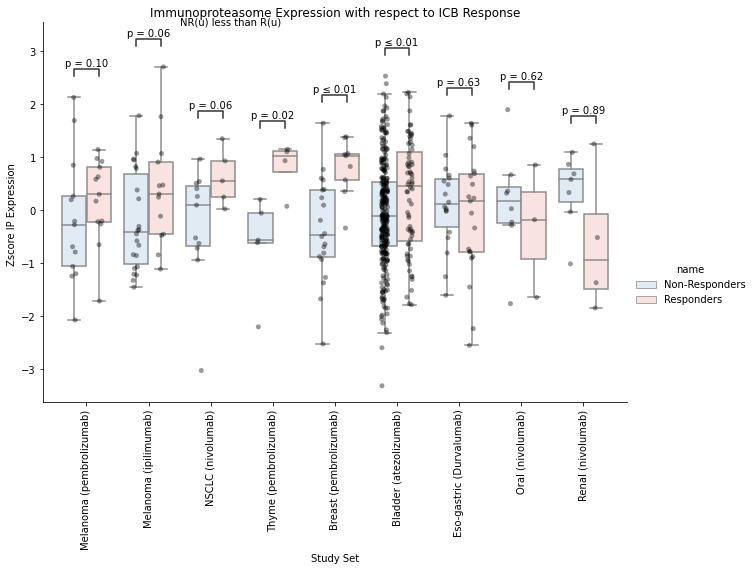

In [150]:
ax=sns.catplot(x="study", y="Immunoproteasome", hue="name", data=ip,palette=['#deebf7','#fde0dd'],height=6,  aspect=1.5,kind='box',showfliers=False,order=order)
res=sns.stripplot(x="study", y="Immunoproteasome", hue="name", data=ip,palette=['black','black'],jitter=True, dodge=True,alpha=0.4,order=order)
add_stat_annotation(res, data=ip, x='study',y='Immunoproteasome',test='Mann-Whitney-ls', hue='name' ,box_pairs=box_pairs,text_format='simple', loc='inside',comparisons_correction=None ,verbose=2,order=order)
res.get_legend().remove()
plt.title('Immunoproteasome Expression with respect to ICB Response')
plt.xticks(rotation=90)
res.set_xlabel("Study Set")
res.annotate('NR(u) less than R(u)',(1.5,3.5))
res.set_ylabel("Zscore IP Expression ")
plt.savefig('Results/IP_response_gt.svg',bbox_inches = "tight",format='svg')
plt.show()

Renal (nivolumab)_Non-Responders v.s. Renal (nivolumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=8.025e-01 U_stat=1.800e+01
Melanoma (ipilimumab)_Non-Responders v.s. Melanoma (ipilimumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=2.112e-01 U_stat=1.190e+02
Melanoma (pembrolizumab)_Non-Responders v.s. Melanoma (pembrolizumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=3.222e-01 U_stat=7.500e+01
NSCLC (nivolumab)_Non-Responders v.s. NSCLC (nivolumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=9.130e-01 U_stat=3.900e+01
Oral (nivolumab)_Non-Responders v.s. Oral (nivolumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=7.934e-01 U_stat=1.550e+01
Eso-gastric (Durvalumab)_Non-Responders v.s. Eso-gastric (Durvalumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=1.390e-01 U_stat=1.500e+02
Thyme (pembrolizumab)_Non-Responders v.s. Thyme (pembrolizumab)_Responders: Mann-Whitney-Wilcoxon test smaller, P_val=5.487e-01 U_stat=1.000e+01

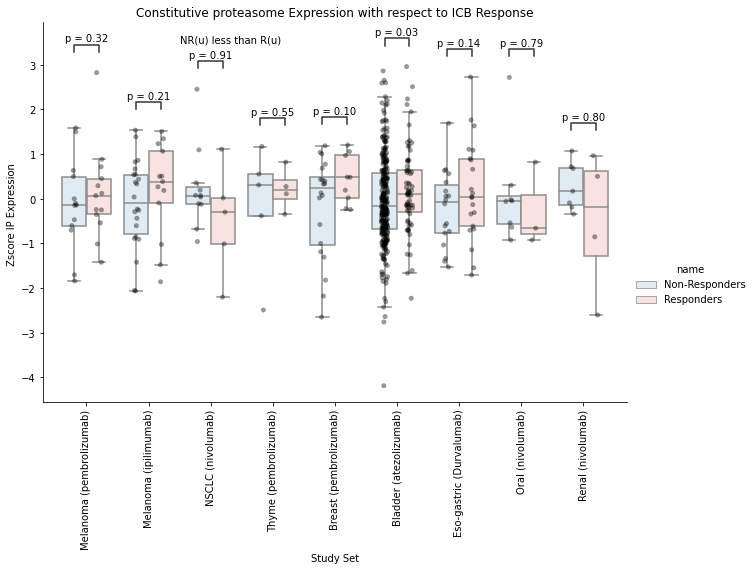

In [151]:
ax=sns.catplot(x="study", y="Const_proteasome", hue="name", data=ip,palette=['#deebf7','#fde0dd'],height=6,  aspect=1.5,kind='box',showfliers=False,order=order)
res=sns.stripplot(x="study", y="Const_proteasome", hue="name", data=ip,palette=['black','black'],jitter=True, dodge=True,alpha=0.4,order=order)
add_stat_annotation(res, data=ip, x='study',y='Const_proteasome',test='Mann-Whitney-ls', hue='name' ,box_pairs=box_pairs,text_format='simple', loc='inside',comparisons_correction=None ,verbose=2,order=order)
res.get_legend().remove()
plt.title('Constitutive proteasome Expression with respect to ICB Response')
plt.xticks(rotation=90)
res.set_xlabel("Study Set")
res.annotate('NR(u) less than R(u)',(1.5,3.5))
res.set_ylabel("Zscore IP Expression ")
plt.savefig('Results/CP_response_gt.svg',bbox_inches = "tight",format='svg')
plt.show()

## Figure 5C

In [152]:
studies=['bladder_pd','Breast_pd','Eso_pd','lung_pd','renal_pd','Thyme_pd','Oral_pd','Melanoma_ct','Melanoma_pd']

In [153]:
dif_gsva=[]
for n in studies:
    temp=pd.read_csv(F"data/Immunotherapy/GSVA/results/high_low_immuno_prtoeasome_Diff_immune_score_{n}.csv",index_col=0)
    temp['study']=n
    #temp.index=temp.index.str.replace('_',' ')
    #temp.index=temp.index.str.replace('cells','')
    #temp.index=temp.index.str.replace('cell','')
    
    dif_gsva.append(temp[['logFC','study']])
dif_gsva=pd.concat(dif_gsva)

In [154]:
dif_gsva=dif_gsva.pivot(columns='study')
dif_gsva.fillna(0,inplace=True)

In [155]:
dif_gsva=dif_gsva[[('logFC', 'Melanoma_pd'),('logFC', 'Melanoma_ct'),('logFC',        'lung_pd'), ('logFC',       'Thyme_pd'),('logFC',      'Breast_pd'),('logFC',      'bladder_pd'),('logFC',         'Eso_pd'),('logFC',        'Oral_pd'),('logFC',       'renal_pd')]]

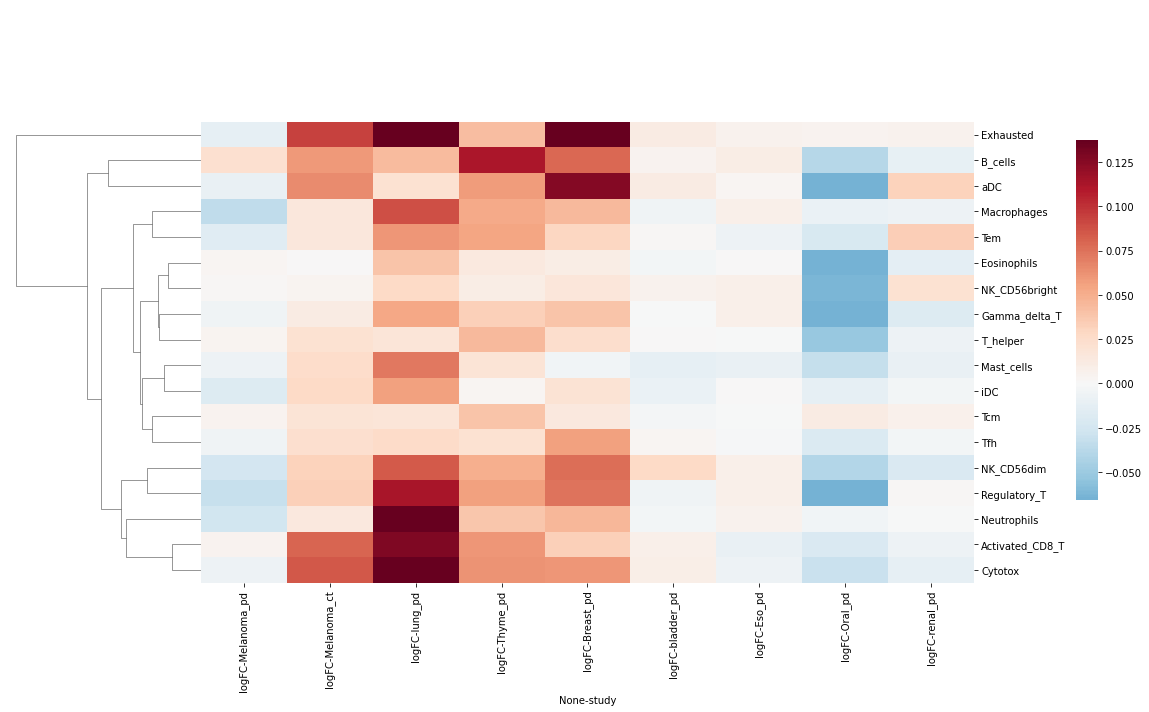

In [156]:
ax=sns.clustermap(dif_gsva,robust=True,cmap='RdBu_r',figsize=(15,10),col_cluster=False,center=0,cbar_pos=(1, 0.3, 0.02, 0.5))
plt.savefig('Results/Immuno_erich.svg',bbox_inches = "tight",format='svg')
plt.show()